In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt

weld_bounds = np.array([0.125, 5])
beam_bounds = np.array([0.1, 10])

def f(x):
    return 1.10471*(x[0]**2)*x[1] + 0.04811*x[2]*x[3]*(14.0+x[1])

In [30]:
def tau1(x):
    return 6000/(math.sqrt(2)*x[0]*x[1])

def tau2(x):
    top = 6000*(14+0.5*x[1])*math.sqrt(0.25*(x[1]**2+(x[0]+x[2])**2))
    bottom = 2 * (0.707 * x[0] * x[1] * ((x[1]**2)/12 + 0.25*(x[0] + x[2])**2))
    return top/bottom

def tau(x):
    return math.sqrt((tau1(x)**2 + tau2(x)**2) + (x[1] * tau1(x) * tau2(x)) / math.sqrt(0.25 * (x[1]**2 + (x[0] + x[2])**2)))
    
def sigma(x):
    return 504000 / (x[2]**2 * x[3])

def pc(x):
    return 64746.022 * (1 - 0.0282346*x[2]) * x[2] * x[3]**3

In [31]:
#Constraints
def g1(x):
    return 13600 - tau(x)

def g2(x):
    return 30000 - sigma(x)

def g3(x):
    return x[3] - x[0]

def g4(x):
    return pc(x) - 6000

In [32]:
#Function Implementation Tests
x = np.array([1.05, 3.15, 4.43, 7.87])

print("Objective function output: ", f(x))
print("First constraint function output: ", g1(x))
print("Second constraint function output: ", g2(x))
print("Third constraint function output: ", g3(x))
print("Fourth constraint function output: ", g4(x))

Objective function output:  32.6024179859
First constraint function output:  5308.848564674312
Second constraint function output:  26736.764990548952
Third constraint function output:  6.82
Fourth constraint function output:  122317448.61430933


In [33]:
def static_pen(x, f, r):
    return r * np.max([0, f(x)])**1

In [34]:
#Random Search
lower_bound = np.array([0.125, 0.125, 0.1, 0.1])
upper_bound = np.array([5, 5, 10, 10])

def random_search(function, lower_bound, upper_bound, iterations):
    x_random = np.array(np.random.uniform(lower_bound, upper_bound, 4))
    x_best = x_random
    y_best = f(x_random)

    for i in range(1, iterations):
        x_random = np.array(np.random.uniform(lower_bound, upper_bound, 4))
        y_new = f(x_random)

        if(y_new < y_best and function(x_random) >= 0 and g1(x_random) >= 0 and g2(x_random) >= 0 and g3(x_random) >= 0 and g4(x_random) >= 0):
            #print("new best")
            x_best = x_random
            y_best = y_new

    if(function(x_best) >= 0 and g1(x_best) >= 0 and g2(x_best) >= 0 and g3(x_best) >= 0 and g4(x_best) >= 0):
        return y_best
    else:
        return 8

best_result = random_search(f, lower_bound, upper_bound, 10000)
print(best_result)

4.343988585335773


In [35]:
#Simulated Annealing
lower_bound = np.array([0.125, 0.125, 0.1, 0.1])
upper_bound = np.array([5, 5, 10, 10])

def simulated_annealing(lower_bound, upper_bound, t_i, iterations):
    x_best = np.array(np.random.uniform(lower_bound, upper_bound, 4))
    y_best = f(x_best)

    x_c = x_best
    y_c = y_best
    
    for k in range(1, iterations):
        x_p = []

        for i in range(len(x)):
            sd = (upper_bound[i] - lower_bound[i]) * 0.1
            normal_random = (np.random.normal(x_c[i], sd))
            if(normal_random < lower_bound[i]):
                normal_random = lower_bound[i]
            elif(normal_random > upper_bound[i]):
                normal_random = upper_bound[i]
            x_p.append(normal_random)
        y_p = f(x_p)

        if(y_p >= 0 and g1(x_p) >= 0 and g2(x_p) >= 0 and g3(x_p) >= 0 and g4(x_p) >= 0):
            y_diff = y_p - y_c
            t_k = t_i/k
            if( y_diff <= 0 or np.random.uniform(0,1) < min(math.exp(-y_diff/t_k), 1) ):
                x_c = x_p
                y_c = y_p
            if(y_p < y_best):
                x_best = x_p
                y_best = y_p

    if(f(x_best) >= 0 and g1(x_best) >= 0 and g2(x_best) >= 0 and g3(x_best) >= 0 and g4(x_best) >= 0):
        return y_best
    else:
        return 8

print(simulated_annealing(lower_bound, upper_bound, 10, 10000))

3.218406861034198


Random Search (21): [3.549441414247313, 4.484466682584574, 5.041308516878308, 3.1024482686041255, 4.0772731010579015, 5.138372385295091, 6.81663354926887, 5.229875799397516, 5.470601373850916, 3.5495062654498146, 3.4544373445515744, 4.733897469502602, 5.532974005329528, 4.213998537256887, 4.881501891214389, 3.840646035426268, 4.977360370149847, 4.904178975957489, 4.389315379682818, 4.704605314916768, 4.247190814615778]
Simulated Annealing (21): [8, 3.134283613130221, 3.300420295718716, 8, 3.7004650564780377, 3.5230223315231934, 2.811948853081889, 3.421542130171314, 3.1720171049701005, 3.690935743975211, 3.0319458414342693, 3.3442756954441974, 2.9128851975401084, 8, 2.9621779601690377, 3.435351523486046, 3.3476467974638737, 3.413796735266344, 2.9145761117074405, 8, 2.9577719964986926]


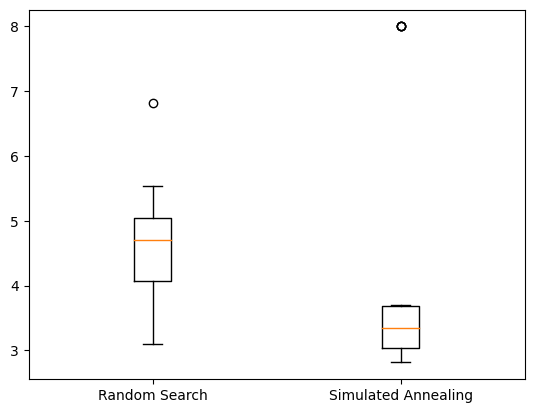

In [71]:
max_rep = 21
iterations = 10000

random = [random_search(f, lower_bound, upper_bound, iterations)
            for i in range(max_rep)]
sim_ann = [simulated_annealing(lower_bound, upper_bound, 10, iterations)
            for i in range(max_rep)]

plt.boxplot([random, sim_ann])
plt.xticks([1,2], ['Random Search', 'Simulated Annealing'])
print("Random Search ({}): {}".format(len(random), random))
print("Simulated Annealing ({}): {}".format(len(sim_ann), sim_ann))

In [72]:
from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(random, sim_ann, alternative="greater")
print("p value: ", p)

p value:  0.0014910322685391852


The p value is less than the acceptance level (0.05), so we reject the null hypothesis.
There is a statistically significant difference between the algorithms.